In [1]:
import sys

# Base de Datos
from pymongo import MongoClient

# Datos
import numpy as np
import pandas as pd

# Clasificación	
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, cohen_kappa_score, roc_auc_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
connection_details  = MONGO_LINK

In [3]:
db_CDS29_name='CDS29';
db_CDS16_name='CDS16';
# db_name='CDS16';

# connect to the mongoclient
client = MongoClient(connection_details);

# the list_database_names() method returns a list of strings
database_names = client.list_database_names();

def load_database(db_name):
    if db_name in database_names:
        print('The database ' +  db_name + ' exists');
        db=client.get_database(db_name);
    else:
        print('&&&&&& The database ' +  db_name + ' must be loaded &&&&&.');
        print()
        sys.exit()

    return db

db_CDS29=load_database(db_CDS29_name);
db_CDS16=load_database(db_CDS16_name);

The database CDS29 exists
The database CDS16 exists


In [4]:
# Visualiza la estructura de la base de datos
print("CDS29: ");
print(db_CDS29.list_collection_names());
print("\nCDS16");
print(db_CDS16.list_collection_names());

# Visualiza la estructura de la colección
print("\nCDS29: ");
print(db_CDS29.CDS29.molecules);
print(db_CDS29.CDS29.mfp_counts);
print("\nCDS16");
print(db_CDS16.CDS29.molecules);
print(db_CDS16.CDS29.mfp_counts);


CDS29: 
['mfp_counts', 'molecules']

CDS16
['molecules', 'mfp_counts']

CDS29: 
Collection(Database(MongoClient(host=['ac-gvy8a20-shard-00-00.75inn2z.mongodb.net:27017', 'ac-gvy8a20-shard-00-01.75inn2z.mongodb.net:27017', 'ac-gvy8a20-shard-00-02.75inn2z.mongodb.net:27017'], document_class=dict, tz_aware=False, connect=True, authsource='admin', replicaset='atlas-ktzz2f-shard-0', tls=True), 'CDS29'), 'CDS29.molecules')
Collection(Database(MongoClient(host=['ac-gvy8a20-shard-00-00.75inn2z.mongodb.net:27017', 'ac-gvy8a20-shard-00-01.75inn2z.mongodb.net:27017', 'ac-gvy8a20-shard-00-02.75inn2z.mongodb.net:27017'], document_class=dict, tz_aware=False, connect=True, authsource='admin', replicaset='atlas-ktzz2f-shard-0', tls=True), 'CDS29'), 'CDS29.mfp_counts')

CDS16
Collection(Database(MongoClient(host=['ac-gvy8a20-shard-00-00.75inn2z.mongodb.net:27017', 'ac-gvy8a20-shard-00-01.75inn2z.mongodb.net:27017', 'ac-gvy8a20-shard-00-02.75inn2z.mongodb.net:27017'], document_class=dict, tz_aware=False

In [5]:
collection_name = 'molecules'

# Función para cargar datos desde una colección
def load_data(db, collection_name):
    collection = db[collection_name]
    cursor = collection.find()
    data = pd.DataFrame(list(cursor))
    return data

# Cargar datos de las colecciones molecules
data_CDS29 = load_data(db_CDS29, collection_name)
data_CDS16 = load_data(db_CDS16, collection_name)

In [6]:
data_CDS16.head()

,_id,smiles,class,MOLECULEID,rdmol,mfp
0,8.0,CNC(=O)c1cc(Oc2ccc(NC(=O)Nc3ccc(Cl)c(C(F)(F)F)...,Inactive,M110015,b'\xef\xbe\xad\xde\x00\x00\x00\x00\x0b\x00\x00...,"{'bits': [9, 33, 53, 56, 114, 128, 153, 184, 1..."
1,3.0,O=C(O)CC(O)CC(O)C=Cc1c(C2CC2)nc2ccccc2c1-c1ccc...,Inactive,M3412451,b'\xef\xbe\xad\xde\x00\x00\x00\x00\x0b\x00\x00...,"{'bits': [1, 25, 64, 73, 80, 90, 105, 117, 136..."
2,9.0,CCN(CC)CCNC(=O)c1c(C)[nH]c(C=C2C(=O)Nc3ccc(F)c...,Inactive,M668046,b'\xef\xbe\xad\xde\x00\x00\x00\x00\x0b\x00\x00...,"{'bits': [8, 33, 36, 74, 80, 90, 96, 107, 128,..."
3,11.0,O=C1NC(=O)N(C2OC(CO)C(O)C2O)CC1=CCBr,Inactive,M97340609,b'\xef\xbe\xad\xde\x00\x00\x00\x00\x0b\x00\x00...,"{'bits': [36, 75, 80, 90, 152, 210, 222, 233, ..."
4,12.0,CC#Cc1cn(C2OC(CO)C(O)C2O)c(=O)[nH]c1=O,Inactive,M9233,b'\xef\xbe\xad\xde\x00\x00\x00\x00\x0b\x00\x00...,"{'bits': [33, 75, 80, 90, 120, 152, 210, 222, ..."


In [7]:
data_CDS29.head()

,_id,smiles,class,MOLECULEID,rdmol,mfp
0,mol4,CC(=O)c1c(C)n(C)c2ccc(O)cc12,Inactive,M652321,"b""\xef\xbe\xad\xde\x00\x00\x00\x00\x0b\x00\x00...","{'bits': [33, 45, 121, 289, 333, 356, 381, 384..."
1,mol11,Cc1cc(O)nc(-n2nc(C)c(Oc3ccccc3O)c2C)n1,Inactive,M754222,"b""\xef\xbe\xad\xde\x00\x00\x00\x00\x0b\x00\x00...","{'bits': [33, 64, 92, 144, 154, 175, 179, 232,..."
2,mol13,Nc1cccc(-c2cc3ccccc3oc2=O)c1,Inactive,M754283,b'\xef\xbe\xad\xde\x00\x00\x00\x00\x0b\x00\x00...,"{'bits': [15, 21, 63, 64, 104, 136, 147, 175, ..."
3,mol17,Cc1ccc(NCCC(=O)c2cccs2)cc1Cl,Inactive,M754220,b'\xef\xbe\xad\xde\x00\x00\x00\x00\x0b\x00\x00...,"{'bits': [14, 33, 61, 64, 79, 80, 128, 181, 19..."
4,mol25,CCCCC(=O)Nc1ccc(Br)cn1,Inactive,M3467584,b'\xef\xbe\xad\xde\x00\x00\x00\x00\x0b\x00\x00...,"{'bits': [33, 36, 41, 75, 80, 128, 133, 154, 1..."


In [8]:
# Preprocesamiento de datos
def expand_fingerprint(mfp_data, size=1024):
    bits = mfp_data.get('bits', [])  # Acceder al diccionario bits en mfp
    fingerprint = np.zeros(size)
    fingerprint[bits] = 1
    return fingerprint

# Aplicar la función a cada fila
data_CDS29['fingerprint'] = data_CDS29['mfp'].apply(lambda mfp_data: expand_fingerprint(mfp_data))
data_CDS16['fingerprint'] = data_CDS16['mfp'].apply(lambda mfp_data: expand_fingerprint(mfp_data))

In [9]:
# Variables predictoras y variable respuesta
X_CDS29 = pd.DataFrame(data_CDS29['fingerprint'].tolist())
X_CDS16 = pd.DataFrame(data_CDS16['fingerprint'].tolist())

# No se han eliminado variables predictoras (las que tienen los valores a 0)
y_CDS29 = data_CDS29['class'].map({'Active': 1, 'Inactive': 0})
y_CDS16 = data_CDS16['class'].map({'Active': 1, 'Inactive': 0})

In [10]:
X_CDS29.head()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
y_CDS29.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

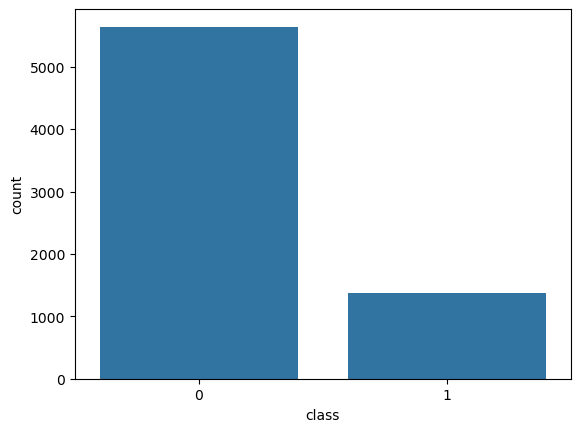

In [12]:
# Gráfico de barras de la variable respuesta
sns.countplot(x=y_CDS29)
plt.show()

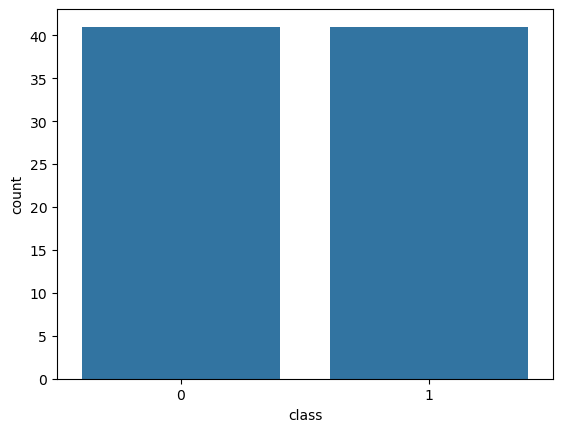

In [13]:
# Gráfico de barras de la variable respuesta
sns.countplot(x=y_CDS16)
plt.show()

In [14]:
# Dividir en conjunto de entrenamiento y prueba con estratificación
X_train_CDS29, X_test_CDS29, y_train_CDS29, y_test_CDS29 = train_test_split(X_CDS29, y_CDS29, test_size=0.2, random_state=42,stratify=y_CDS29)
X_train_CDS16, X_test_CDS16, y_train_CDS16, y_test_CDS16 = train_test_split(X_CDS16, y_CDS16, test_size=0.2, random_state=42,stratify=y_CDS16)

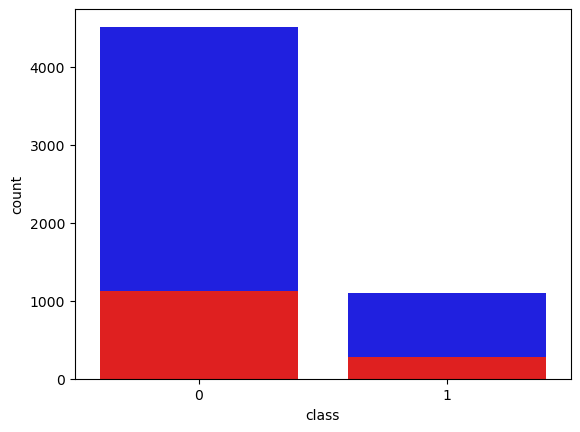

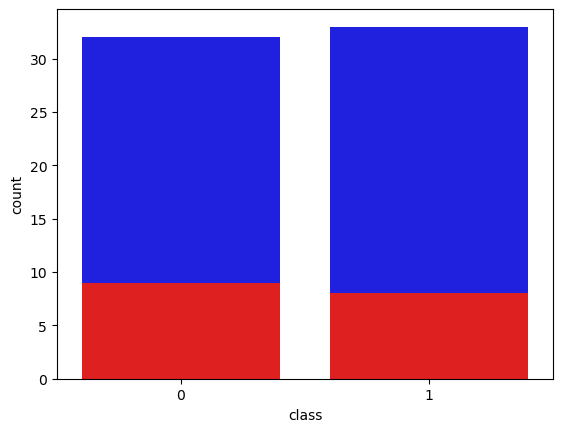

In [19]:
# Gráfico de barras de la variable respuesta de train y de test en colores diferentes
sns.countplot(x=y_train_CDS29, color='blue')
sns.countplot(x=y_test_CDS29, color='red')
plt.show()

# Gráfico de barras de la variable respuesta de train y de test en colores diferentes
sns.countplot(x=y_train_CDS16, color='blue')
sns.countplot(x=y_test_CDS16, color='red')
plt.show()

### Clasificación

In [15]:
# 1. Random Forest
model_rf_CDS29 = RandomForestClassifier(random_state=42)
model_rf_CDS29.fit(X_train_CDS29, y_train_CDS29)

model_rf_CDS16 = RandomForestClassifier(random_state=42)
model_rf_CDS16.fit(X_train_CDS16, y_train_CDS16)

RandomForestClassifier(random_state=42)

In [16]:
# 2. Random Forest con 100 árboles y profundidad máxima de 10
model_rf_100_CDS29 = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
model_rf_100_CDS29.fit(X_train_CDS29, y_train_CDS29)

model_rf_100_CDS16 = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
model_rf_100_CDS16.fit(X_train_CDS16, y_train_CDS16)

RandomForestClassifier(max_depth=10, random_state=42)

In [17]:
# 3. Naive Bayes
model_nb_CDS29 = GaussianNB()
model_nb_CDS29.fit(X_train_CDS29, y_train_CDS29)

model_nb_CDS16 = GaussianNB()
model_nb_CDS16.fit(X_train_CDS16, y_train_CDS16)

GaussianNB()

In [18]:
# 4. SVC
model_svc_CDS29 = SVC(random_state=42)
model_svc_CDS29.fit(X_train_CDS29, y_train_CDS29)

model_svc_CDS16 = SVC(random_state=42)
model_svc_CDS16.fit(X_train_CDS16, y_train_CDS16)

SVC(random_state=42)

#### Evaluación de los modelos

In [22]:
# Predicciones
y_pred_rf_CDS29 = model_rf_CDS29.predict(X_test_CDS29)
y_pred_rf_100_CDS29 = model_rf_100_CDS29.predict(X_test_CDS29)
y_pred_nb_CDS29 = model_nb_CDS29.predict(X_test_CDS29)
y_pred_svc_CDS29 = model_svc_CDS29.predict(X_test_CDS29)

y_pred_rf_CDS16 = model_rf_CDS16.predict(X_test_CDS16)
y_pred_rf_100_CDS16 = model_rf_100_CDS16.predict(X_test_CDS16)
y_pred_nb_CDS16 = model_nb_CDS16.predict(X_test_CDS16)
y_pred_svc_CDS16 = model_svc_CDS16.predict(X_test_CDS16)

CDS29

In [23]:
# Reporte de clasificación
print('Classification Report Random Forest: \n', classification_report(y_test_CDS29, y_pred_rf_CDS29))
print('\n\n\n\n\n\nClassification Report Random Forest 100: \n', classification_report(y_test_CDS29, y_pred_rf_100_CDS29))
print('\n\n\n\n\n\nClassification Report Naive Bayes: \n', classification_report(y_test_CDS29, y_pred_nb_CDS29))
print('\n\n\n\n\n\nClassification Report SVC: \n', classification_report(y_test_CDS29, y_pred_svc_CDS29))

Classification Report Random Forest: 
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      1128
           1       0.53      0.12      0.20       275

    accuracy                           0.81      1403
   macro avg       0.68      0.55      0.55      1403
weighted avg       0.76      0.81      0.75      1403







Classification Report Random Forest 100: 
               precision    recall  f1-score   support

           0       0.81      1.00      0.89      1128
           1       0.88      0.03      0.05       275

    accuracy                           0.81      1403
   macro avg       0.84      0.51      0.47      1403
weighted avg       0.82      0.81      0.73      1403







Classification Report Naive Bayes: 
               precision    recall  f1-score   support

           0       0.88      0.50      0.64      1128
           1       0.26      0.72      0.38       275

    accuracy                           0.54      14

#### Matriz de confusión

Confusion Matrix Random Forest: 
 [[1098   30]
 [ 241   34]]


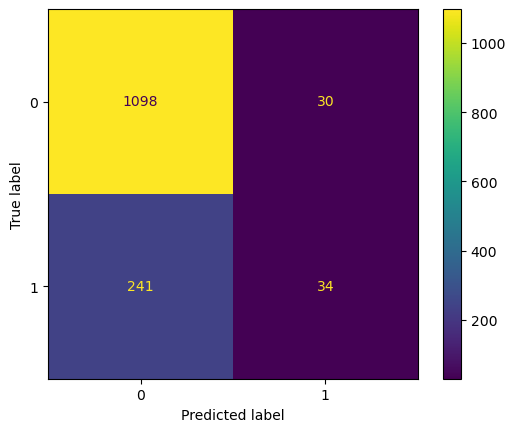

Confusion Matrix Normalizada Random Forest: 
 [[0.97340426 0.02659574]
 [0.87636364 0.12363636]]


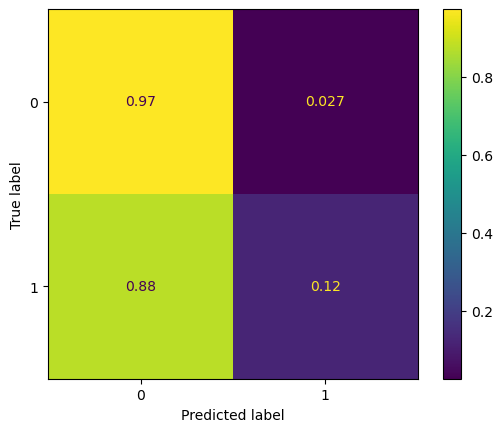







Confusion Matrix Random Forest 100: 
 [[1127    1]
 [ 268    7]]


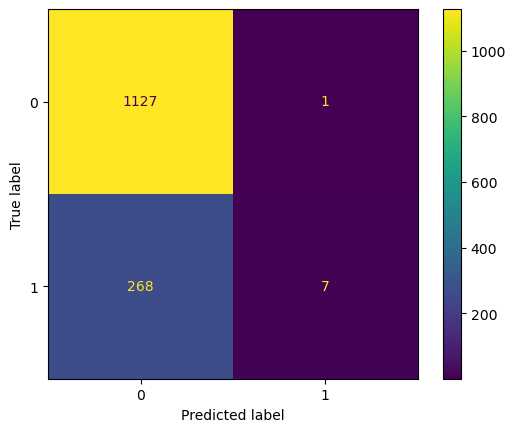

Confusion Matrix Normalizada Random Forest 100: 
 [[9.99113475e-01 8.86524823e-04]
 [9.74545455e-01 2.54545455e-02]]


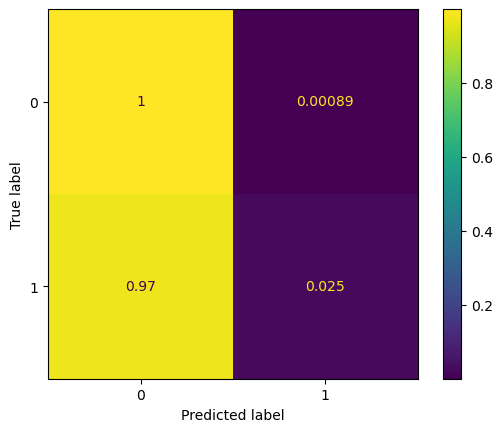







Confusion Matrix Naive Bayes: 
 [[563 565]
 [ 76 199]]


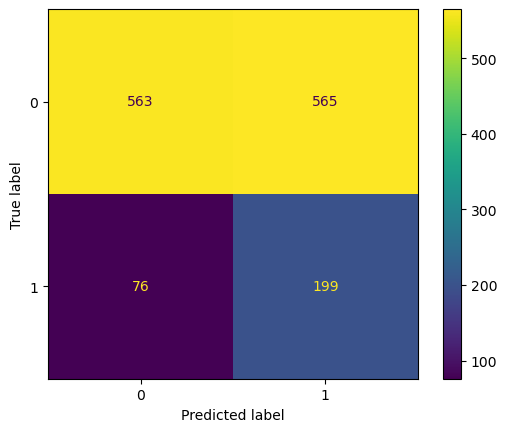

Confusion Matrix Normalizada Naive Bayes: 
 [[0.49911348 0.50088652]
 [0.27636364 0.72363636]]


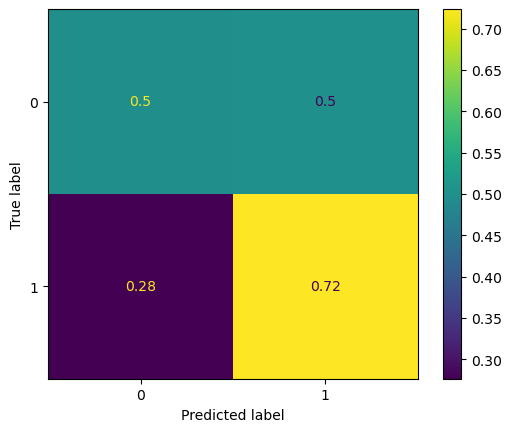







Confusion Matrix SVC: 
 [[1119    9]
 [ 263   12]]


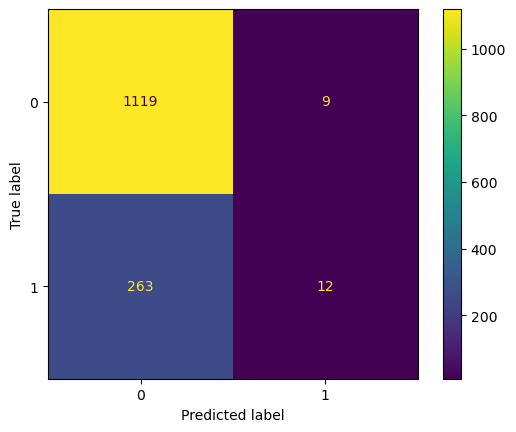

Confusion Matrix Normalizada SVC: 
 [[0.99202128 0.00797872]
 [0.95636364 0.04363636]]


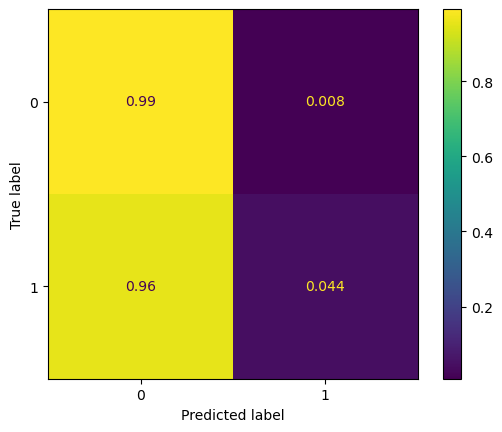

In [24]:
# Random Forest
cm_rf = confusion_matrix(y_test_CDS29, y_pred_rf_CDS29)
print('Confusion Matrix Random Forest: \n', cm_rf)
cm_display = ConfusionMatrixDisplay(cm_rf).plot()
plt.show()
# Matriz Normalizada
cm_rf_norm = cm_rf.astype('float') / cm_rf.sum(axis=1)[:, np.newaxis]
print('Confusion Matrix Normalizada Random Forest: \n', cm_rf_norm)
cm_display = ConfusionMatrixDisplay(cm_rf_norm).plot()
plt.show()

print("\n\n\n=================================================\n\n\n")

# Random Forest con 100 árboles y profundidad máxima de 10
cm_rf_100 = confusion_matrix(y_test_CDS29, y_pred_rf_100_CDS29)
print('Confusion Matrix Random Forest 100: \n', cm_rf_100)
cm_display = ConfusionMatrixDisplay(cm_rf_100).plot()
plt.show()
# Matriz Normalizada
cm_rf_100_norm = cm_rf_100.astype('float') / cm_rf_100.sum(axis=1)[:, np.newaxis]
print('Confusion Matrix Normalizada Random Forest 100: \n', cm_rf_100_norm)
cm_display = ConfusionMatrixDisplay(cm_rf_100_norm).plot()
plt.show()

print("\n\n\n=================================================\n\n\n")

# Naive Bayes
cm_nb = confusion_matrix(y_test_CDS29, y_pred_nb_CDS29)
print('Confusion Matrix Naive Bayes: \n', cm_nb)
cm_display = ConfusionMatrixDisplay(cm_nb).plot()
plt.show()
# Matriz Normalizada
cm_nb_norm = cm_nb.astype('float') / cm_nb.sum(axis=1)[:, np.newaxis]
print('Confusion Matrix Normalizada Naive Bayes: \n', cm_nb_norm)
cm_display = ConfusionMatrixDisplay(cm_nb_norm).plot()
plt.show()

print("\n\n\n=================================================\n\n\n")

# SVC
cm_svc = confusion_matrix(y_test_CDS29, y_pred_svc_CDS29)
print('Confusion Matrix SVC: \n', cm_svc)
cm_display = ConfusionMatrixDisplay(cm_svc).plot()
plt.show()
# Matriz Normalizada
cm_svc_norm = cm_svc.astype('float') / cm_svc.sum(axis=1)[:, np.newaxis]
print('Confusion Matrix Normalizada SVC: \n', cm_svc_norm)
cm_display = ConfusionMatrixDisplay(cm_svc_norm).plot()
plt.show()

CDS16

Classification Report Random Forest: 
               precision    recall  f1-score   support

           0       0.89      0.89      0.89         9
           1       0.88      0.88      0.88         8

    accuracy                           0.88        17
   macro avg       0.88      0.88      0.88        17
weighted avg       0.88      0.88      0.88        17







Classification Report Random Forest 100: 
               precision    recall  f1-score   support

           0       0.89      0.89      0.89         9
           1       0.88      0.88      0.88         8

    accuracy                           0.88        17
   macro avg       0.88      0.88      0.88        17
weighted avg       0.88      0.88      0.88        17







Classification Report Naive Bayes: 
               precision    recall  f1-score   support

           0       0.80      0.89      0.84         9
           1       0.86      0.75      0.80         8

    accuracy                           0.82        

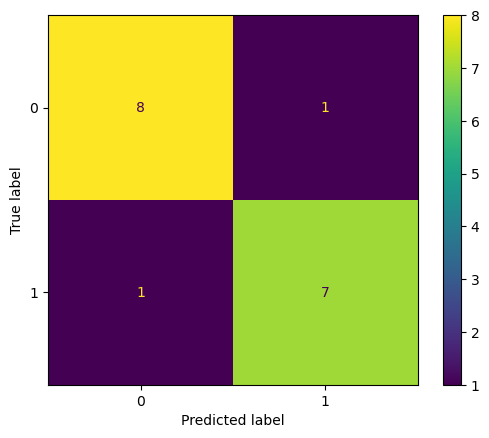

Confusion Matrix Normalizada Random Forest: 
 [[0.88888889 0.11111111]
 [0.125      0.875     ]]


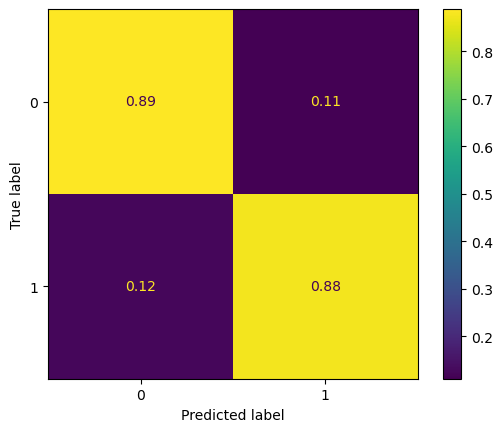







Confusion Matrix Random Forest 100: 
 [[8 1]
 [1 7]]


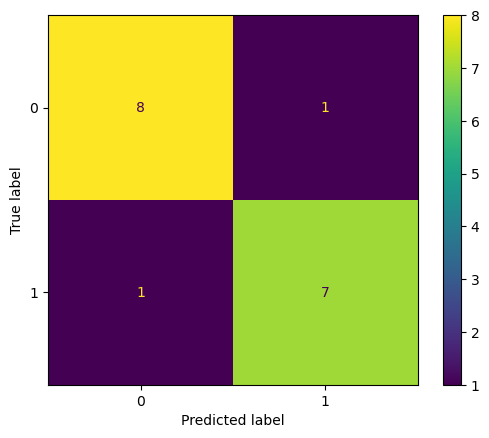

Confusion Matrix Normalizada Random Forest 100: 
 [[0.88888889 0.11111111]
 [0.125      0.875     ]]


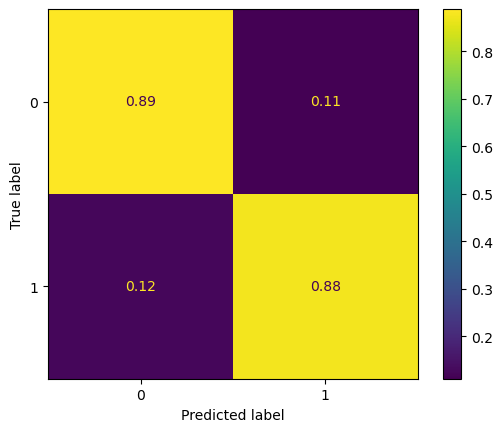







Confusion Matrix Naive Bayes: 
 [[8 1]
 [2 6]]


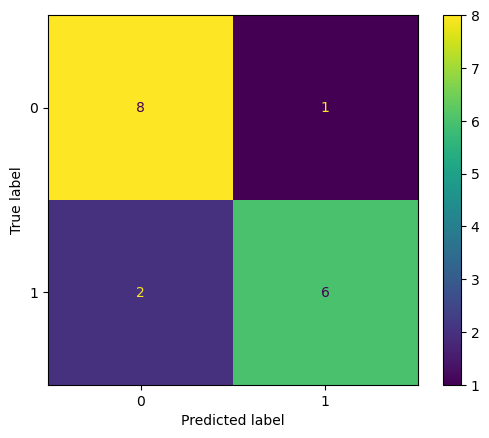

Confusion Matrix Normalizada Naive Bayes: 
 [[0.88888889 0.11111111]
 [0.25       0.75      ]]


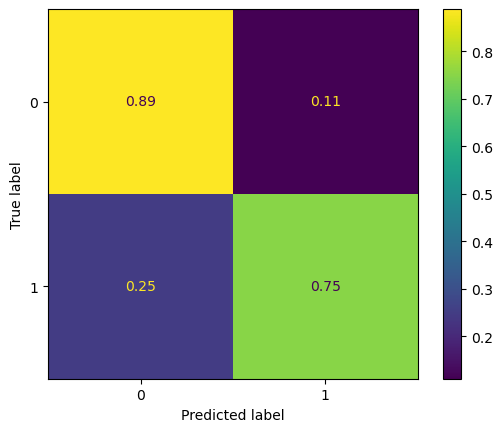







Confusion Matrix SVC: 
 [[8 1]
 [2 6]]


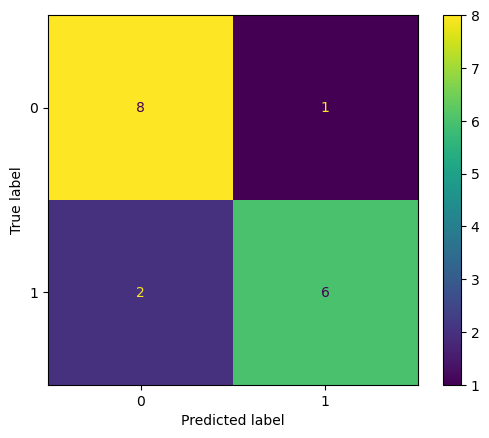

Confusion Matrix Normalizada SVC: 
 [[0.88888889 0.11111111]
 [0.25       0.75      ]]


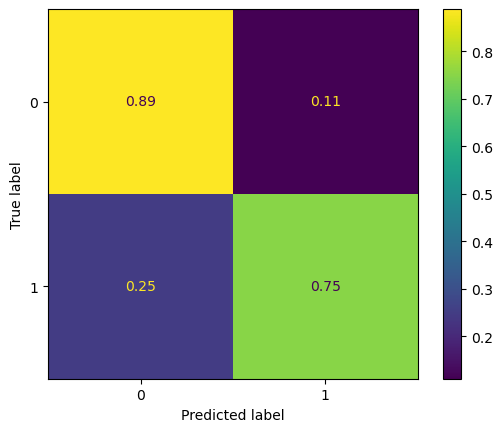

In [25]:
# Reporte de clasificación
print('Classification Report Random Forest: \n', classification_report(y_test_CDS16, y_pred_rf_CDS16))
print('\n\n\n\n\n\nClassification Report Random Forest 100: \n', classification_report(y_test_CDS16, y_pred_rf_100_CDS16))
print('\n\n\n\n\n\nClassification Report Naive Bayes: \n', classification_report(y_test_CDS16, y_pred_nb_CDS16))
print('\n\n\n\n\n\nClassification Report SVC: \n', classification_report(y_test_CDS16, y_pred_svc_CDS16))

# Random Forest
cm_rf = confusion_matrix(y_test_CDS16, y_pred_rf_CDS16)
print('Confusion Matrix Random Forest: \n', cm_rf)
cm_display = ConfusionMatrixDisplay(cm_rf).plot()
plt.show()
# Matriz Normalizada
cm_rf_norm = cm_rf.astype('float') / cm_rf.sum(axis=1)[:, np.newaxis]
print('Confusion Matrix Normalizada Random Forest: \n', cm_rf_norm)
cm_display = ConfusionMatrixDisplay(cm_rf_norm).plot()
plt.show()

print("\n\n\n=================================================\n\n\n")

# Random Forest con 100 árboles y profundidad máxima de 10
cm_rf_100 = confusion_matrix(y_test_CDS16, y_pred_rf_100_CDS16)
print('Confusion Matrix Random Forest 100: \n', cm_rf_100)
cm_display = ConfusionMatrixDisplay(cm_rf_100).plot()
plt.show()
# Matriz Normalizada
cm_rf_100_norm = cm_rf_100.astype('float') / cm_rf_100.sum(axis=1)[:, np.newaxis]
print('Confusion Matrix Normalizada Random Forest 100: \n', cm_rf_100_norm)
cm_display = ConfusionMatrixDisplay(cm_rf_100_norm).plot()
plt.show()

print("\n\n\n=================================================\n\n\n")

# Naive Bayes
cm_nb = confusion_matrix(y_test_CDS16, y_pred_nb_CDS16)
print('Confusion Matrix Naive Bayes: \n', cm_nb)
cm_display = ConfusionMatrixDisplay(cm_nb).plot()
plt.show()
# Matriz Normalizada
cm_nb_norm = cm_nb.astype('float') / cm_nb.sum(axis=1)[:, np.newaxis]
print('Confusion Matrix Normalizada Naive Bayes: \n', cm_nb_norm)
cm_display = ConfusionMatrixDisplay(cm_nb_norm).plot()
plt.show()

print("\n\n\n=================================================\n\n\n")

# SVC
cm_svc = confusion_matrix(y_test_CDS16, y_pred_svc_CDS16)
print('Confusion Matrix SVC: \n', cm_svc)
cm_display = ConfusionMatrixDisplay(cm_svc).plot()
plt.show()
# Matriz Normalizada
cm_svc_norm = cm_svc.astype('float') / cm_svc.sum(axis=1)[:, np.newaxis]
print('Confusion Matrix Normalizada SVC: \n', cm_svc_norm)
cm_display = ConfusionMatrixDisplay(cm_svc_norm).plot()
plt.show()